Ziel: Dimensionsreduktion
-> Einteilung der Variablen in korrelierte Hauptkomponenten
<br>
Support Vector Machine (SVM)

In [17]:
import pandas as pd

dataset = pd.read_csv("lung_cancer_dataset.csv")

# Convert text to categorical data
dataset['gender'] = dataset['gender'].astype('category')
dataset['radon_exposure'] = dataset['radon_exposure'].astype('category')
dataset['alcohol_consumption'] = dataset['alcohol_consumption'].fillna('None').astype('category')

dataset['asbestos_exposure'] = dataset['asbestos_exposure'].map({'Yes': True, 'No': False})
dataset['secondhand_smoke_exposure'] = dataset['secondhand_smoke_exposure'].map({'Yes': True, 'No': False})
dataset['copd_diagnosis'] = dataset['copd_diagnosis'].map({'Yes': True, 'No': False})
dataset['family_history'] = dataset['family_history'].map({'Yes': True, 'No': False})
dataset['lung_cancer'] = dataset['lung_cancer'].map({'Yes': True, 'No': False})

# show data
dataset.head()

,patient_id,age,gender,pack_years,radon_exposure,asbestos_exposure,secondhand_smoke_exposure,copd_diagnosis,alcohol_consumption,family_history,lung_cancer
0,100000,69,Male,66.025244,High,False,False,True,Moderate,False,False
1,100001,32,Female,12.780800,High,False,True,True,Moderate,True,True
2,100002,89,Female,0.408278,Medium,True,True,True,None,False,True
3,100003,78,Female,44.065232,Low,False,True,False,Moderate,False,True
4,100004,38,Female,44.432440,Medium,True,False,True,None,True,True


In [18]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Numerische und kategoriale Spalten trennen
numeric_features = ['age', 'pack_years']
categorical_features = ['gender', 'radon_exposure', 'alcohol_consumption']
boolean_features = ['asbestos_exposure', 'secondhand_smoke_exposure',
                    'copd_diagnosis', 'family_history']

# Preprocessing definieren
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(drop='first'), categorical_features),
        ('bool', 'passthrough', boolean_features)
    ])

# PCA-Pipeline
pca = PCA(n_components=2)  # z.B. 2 Hauptkomponenten
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('pca', pca)])

# Daten vorbereiten (Zielvariable 'lung_cancer' nicht nutzen!)
X = dataset.drop('lung_cancer', axis=1)

# PCA ausführen
X_pca = pipeline.fit_transform(X)

# Ergebnisse in DataFrame packen
pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
print(pca_df.head())

# Erklärte Varianzanteile
print("Varianzanteile:", pca.explained_variance_ratio_)

        PC1       PC2
0  0.705337 -0.091829
1 -1.696736  0.103087
2 -0.347792  2.108764
3  0.423018  0.709496
4 -0.758917 -0.478093
Varianzanteile: [0.24248565 0.24082652]


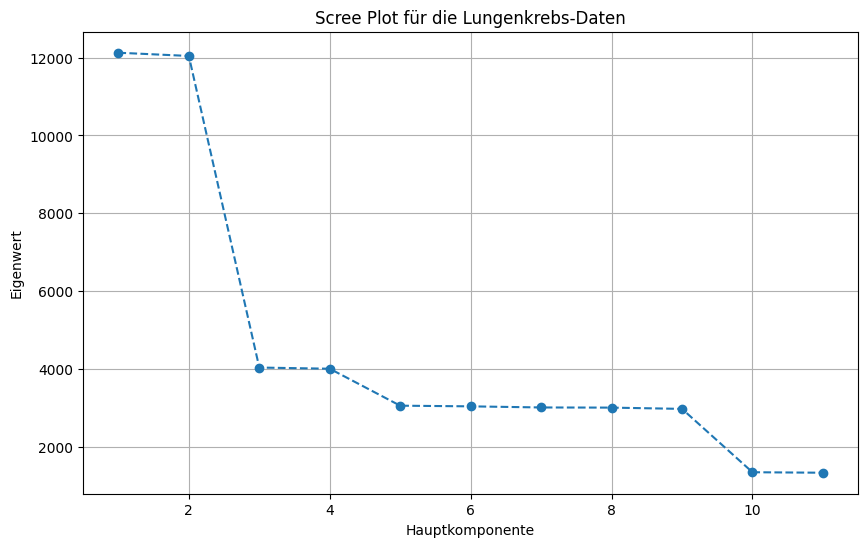

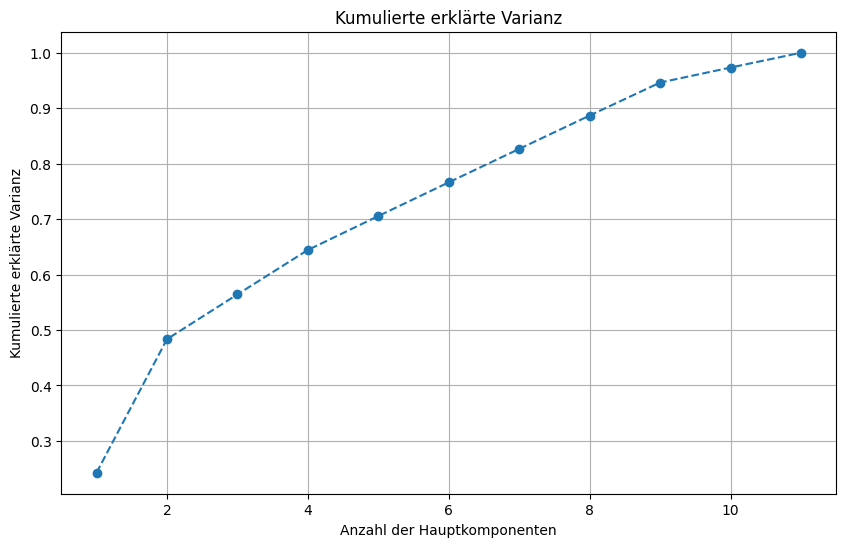

In [21]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import numpy as np

# Daten laden und vorbereiten
dataset = pd.read_csv("lung_cancer_dataset.csv")

# ... (Dein bereits vorhandener Code zur Datenvorbereitung) ...
dataset['gender'] = dataset['gender'].astype('category')
dataset['radon_exposure'] = dataset['radon_exposure'].astype('category')
dataset['alcohol_consumption'] = dataset['alcohol_consumption'].fillna('None').astype('category')
dataset['asbestos_exposure'] = dataset['asbestos_exposure'].map({'Yes': True, 'No': False})
dataset['secondhand_smoke_exposure'] = dataset['secondhand_smoke_exposure'].map({'Yes': True, 'No': False})
dataset['copd_diagnosis'] = dataset['copd_diagnosis'].map({'Yes': True, 'No': False})
dataset['family_history'] = dataset['family_history'].map({'Yes': True, 'No': False})
dataset['lung_cancer'] = dataset['lung_cancer'].map({'Yes': True, 'No': False})

# Numerische und kategoriale Spalten trennen
numeric_features = ['age', 'pack_years']
categorical_features = ['gender', 'radon_exposure', 'alcohol_consumption']
boolean_features = ['asbestos_exposure', 'secondhand_smoke_exposure',
                    'copd_diagnosis', 'family_history']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(drop='first'), categorical_features),
        ('bool', 'passthrough', boolean_features)
    ])

# PCA-Pipeline ohne Komponentenbeschränkung
pca_full = PCA(n_components=None)  # Keine Beschränkung der Komponenten
pipeline_full = Pipeline(steps=[('preprocessor', preprocessor),
                                ('pca', pca_full)])

# Daten vorbereiten (Zielvariable 'lung_cancer' nicht nutzen!)
X = dataset.drop('lung_cancer', axis=1)

# PCA ausführen
pipeline_full.fit(X)

# Erklärte Varianzanteile erhalten
explained_variance_ratio = pca_full.explained_variance_ratio_

# Eigenwerte berechnen
eigenvalues = explained_variance_ratio * len(X)

# Scree Plot erstellen
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(eigenvalues) + 1), eigenvalues, marker='o', linestyle='--')
plt.xlabel('Hauptkomponente')
plt.ylabel('Eigenwert')
plt.title('Scree Plot für die Lungenkrebs-Daten')
plt.grid(True)
plt.show()

# Kumulierte erklärte Varianz
cumulative_variance = np.cumsum(explained_variance_ratio)
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.xlabel('Anzahl der Hauptkomponenten')
plt.ylabel('Kumulierte erklärte Varianz')
plt.title('Kumulierte erklärte Varianz')
plt.grid(True)
plt.show()

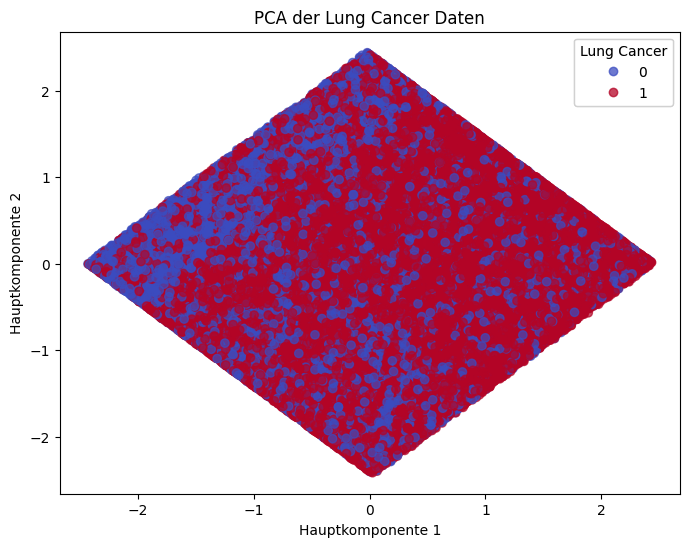

In [3]:
import matplotlib.pyplot as plt

# PCA mit Zielvariable zusammenführen
pca_df['lung_cancer'] = dataset['lung_cancer'].values

plt.figure(figsize=(8,6))
scatter = plt.scatter(
    pca_df['PC1'], pca_df['PC2'],
    c=pca_df['lung_cancer'],  # Farbe nach Zielvariable
    cmap='coolwarm', alpha=0.7
)

plt.xlabel("Hauptkomponente 1")
plt.ylabel("Hauptkomponente 2")
plt.title("PCA der Lung Cancer Daten")

# Legende
legend1 = plt.legend(*scatter.legend_elements(),
                     title="Lung Cancer")
plt.gca().add_artist(legend1)

plt.show()


In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Aufteilen in Trainings- und Testdaten
X = dataset.drop('lung_cancer', axis=1)
y = dataset['lung_cancer']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Neue Pipeline mit Klassifikator
classifier_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(solver='liblinear')) # Hier kommt der Klassifikator
])

# Pipeline trainieren
classifier_pipeline.fit(X_train, y_train)

# Vorhersagen treffen
y_pred = classifier_pipeline.predict(X_test)

# Genauigkeit bewerten
accuracy = accuracy_score(y_test, y_pred)
print(f"Genauigkeit: {accuracy:.2f}")

Genauigkeit: 0.72


In [22]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Datensatz laden und vorbereiten
dataset = pd.read_csv("lung_cancer_dataset.csv")

# Daten in Kategorien und Booleans umwandeln, wie du es bereits gemacht hast
dataset['gender'] = dataset['gender'].astype('category')
dataset['radon_exposure'] = dataset['radon_exposure'].astype('category')
dataset['alcohol_consumption'] = dataset['alcohol_consumption'].fillna('None').astype('category')
dataset['asbestos_exposure'] = dataset['asbestos_exposure'].map({'Yes': True, 'No': False})
dataset['secondhand_smoke_exposure'] = dataset['secondhand_smoke_exposure'].map({'Yes': True, 'No': False})
dataset['copd_diagnosis'] = dataset['copd_diagnosis'].map({'Yes': True, 'No': False})
dataset['family_history'] = dataset['family_history'].map({'Yes': True, 'No': False})
dataset['lung_cancer'] = dataset['lung_cancer'].map({'Yes': True, 'No': False})

# Numerische, kategoriale und boolesche Spalten trennen
numeric_features = ['age', 'pack_years']
categorical_features = ['gender', 'radon_exposure', 'alcohol_consumption']
boolean_features = ['asbestos_exposure', 'secondhand_smoke_exposure',
                    'copd_diagnosis', 'family_history']

# Preprocessor definieren (wie in deinem vorherigen Code)
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(drop='first'), categorical_features),
        ('bool', 'passthrough', boolean_features)
    ])

# **PCA-Pipeline mit 4 Komponenten**
pca = PCA(n_components=4) 
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('pca', pca)])

# Daten vorbereiten (Zielvariable 'lung_cancer' nicht nutzen!)
X = dataset.drop('lung_cancer', axis=1)

# PCA ausführen
X_pca = pipeline.fit_transform(X)

# Ergebnisse in einen DataFrame packen
pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2', 'PC3', 'PC4'])
print(pca_df.head())

# Erklärte Varianzanteile für die 4 Komponenten
print("\nVarianzanteile der 4 Komponenten:", pca.explained_variance_ratio_)

        PC1       PC2       PC3       PC4
0  0.705337 -0.091829 -0.345425  0.611185
1 -1.696736  0.103087 -0.331265  0.625568
2 -0.347792  2.108764 -0.282908 -0.948608
3  0.423018  0.709496  0.277061  0.958140
4 -0.758917 -0.478093 -0.272156 -0.972455

Varianzanteile der 4 Komponenten: [0.24248565 0.24082652 0.08076921 0.08016464]


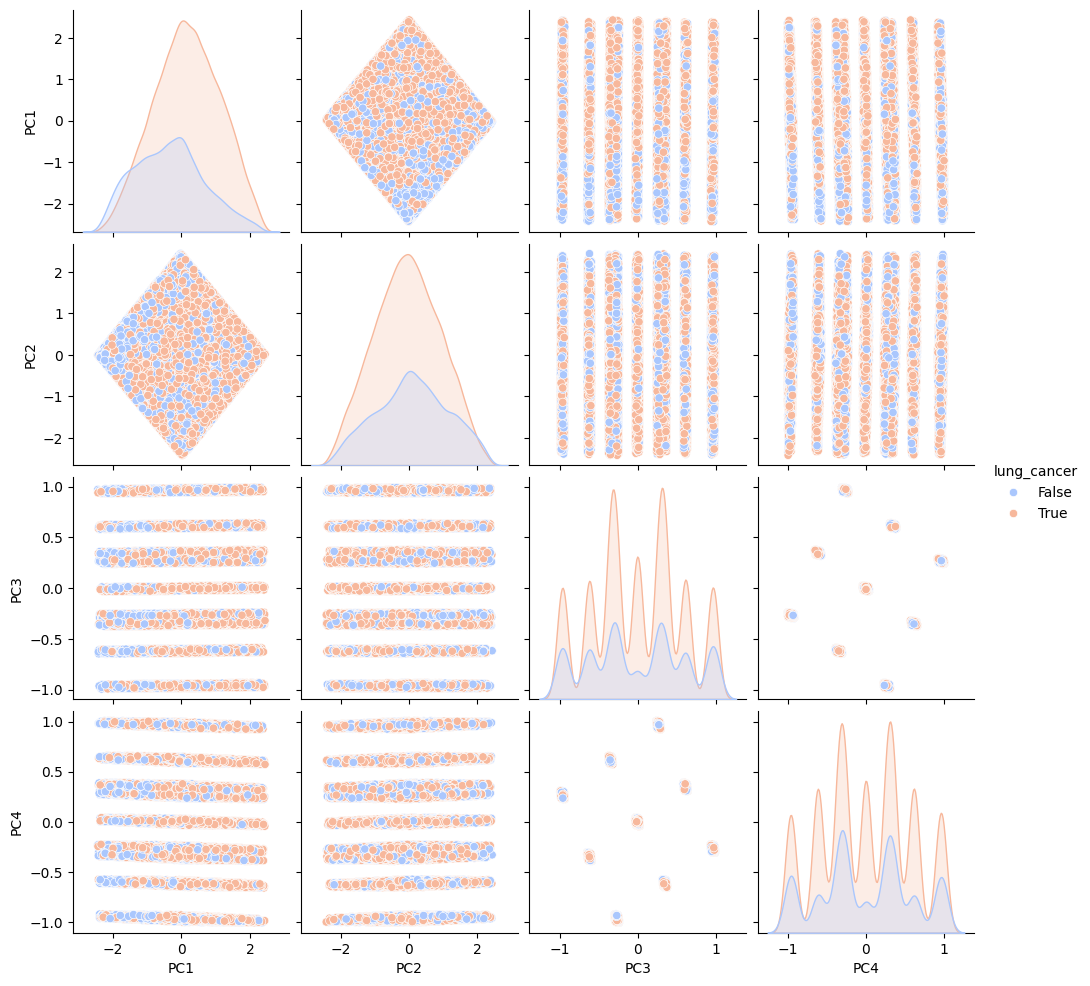

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# Wir verwenden den zuvor erstellten pca_df DataFrame
# und fügen die Zielvariable wieder hinzu.
pca_df['lung_cancer'] = dataset['lung_cancer'].values

# Erstelle ein Pairplot
sns.pairplot(
    pca_df, 
    hue='lung_cancer', 
    vars=['PC1', 'PC2', 'PC3', 'PC4'], 
    palette='coolwarm',
    markers='o'
)
plt.show()

In [24]:
import numpy as np

# Erhalte die Spaltennamen nach dem Preprocessing
feature_names_list = []
# Numerische Features
feature_names_list.extend(numeric_features)
# Kategoriale Features nach One-Hot-Encoding
ohe_feature_names = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features)
feature_names_list.extend(ohe_feature_names)
# Boolesche Features
feature_names_list.extend(boolean_features)

# Extrahiere die Ladevektoren (Loadings)
loadings = pipeline.named_steps['pca'].components_

# Erstelle einen DataFrame für die übersichtliche Darstellung
loading_df = pd.DataFrame(
    loadings.T, 
    columns=['PC1', 'PC2', 'PC3', 'PC4'], 
    index=feature_names_list
)

# Zeige die Loadings an
print("Loadings (Beiträge der Variablen zu den Hauptkomponenten):")
print(loading_df)

# Um die wichtigsten Variablen pro Komponente zu sehen, kannst du die Werte sortieren
for pc_num in range(4):
    pc_name = f'PC{pc_num+1}'
    print(f"\nTop 5 Beiträge für {pc_name}:")
    print(loading_df[pc_name].abs().sort_values(ascending=False).head(5))

Loadings (Beiträge der Variablen zu den Hauptkomponenten):
                                   PC1       PC2       PC3       PC4
age                           0.702913  0.711244  0.002701 -0.002507
pack_years                    0.711184 -0.702888  0.002165 -0.011466
gender_Male                   0.001913 -0.003382 -0.005116  0.021438
radon_exposure_Low           -0.001147 -0.002037  0.615644  0.347609
radon_exposure_Medium        -0.003811  0.002737 -0.615027 -0.348294
alcohol_consumption_Moderate  0.006771 -0.003268 -0.344736  0.615976
alcohol_consumption_None     -0.007803  0.004045  0.350858 -0.614555
asbestos_exposure            -0.001110 -0.001699 -0.022504  0.005247
secondhand_smoke_exposure    -0.001079 -0.003444  0.002005  0.011239
copd_diagnosis                0.000929 -0.001250 -0.000353 -0.001760
family_history               -0.001074 -0.003742  0.015205 -0.000448

Top 5 Beiträge für PC1:
pack_years                      0.711184
age                             0.702913
alcoho

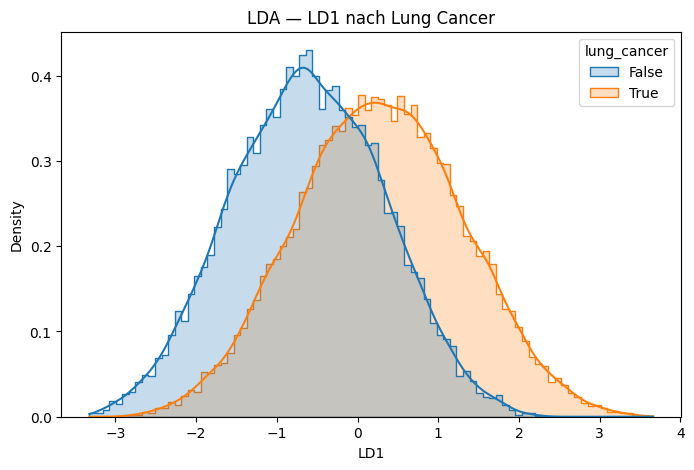

In [12]:
import seaborn as sns
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA(n_components=1)
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('lda', lda)])

X = dataset.drop(columns='lung_cancer')
y = dataset['lung_cancer']

X_lda = pipeline.fit_transform(X, y)

lda_df = pd.DataFrame({'LD1': X_lda.ravel(), 'lung_cancer': y.values})

plt.figure(figsize=(8,5))
sns.histplot(data=lda_df, x='LD1', hue='lung_cancer',
             kde=True, stat='density', element='step', common_norm=False)
plt.title('LDA — LD1 nach Lung Cancer')
plt.xlabel('LD1')
plt.show()


In [25]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# ... (Dein bereits vorhandener Code zur Datenvorbereitung und den Spaltenlisten) ...

# Definition der Spalten für den Preprocessor
numeric_features = ['age', 'pack_years']
categorical_features = ['gender', 'radon_exposure', 'alcohol_consumption']
boolean_features = ['asbestos_exposure', 'secondhand_smoke_exposure',
                    'copd_diagnosis', 'family_history']

# Preprocessor-Definition
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(drop='first'), categorical_features),
        ('bool', 'passthrough', boolean_features)
    ])

# Pipeline mit Preprocessing und LDA
lda_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('lda', LDA(n_components=1))
])

# Daten vorbereiten
X = dataset.drop('lung_cancer', axis=1)
y = dataset['lung_cancer']

In [26]:
# Daten aufteilen (80% Training, 20% Test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Pipeline trainieren
lda_pipeline.fit(X_train, y_train)

,steps,"[('preprocessor', ...), ('lda', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...), ...]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [27]:
# Vorhersagen auf dem Testset
y_pred = lda_pipeline.predict(X_test)

# Modellleistung bewerten
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Genauigkeit: {accuracy:.2f}")
print("\nKlassifizierungsbericht:")
print(report)

Genauigkeit: 0.72

Klassifizierungsbericht:
              precision    recall  f1-score   support

       False       0.59      0.34      0.43      3118
        True       0.75      0.89      0.81      6882

    accuracy                           0.72     10000
   macro avg       0.67      0.61      0.62     10000
weighted avg       0.70      0.72      0.69     10000



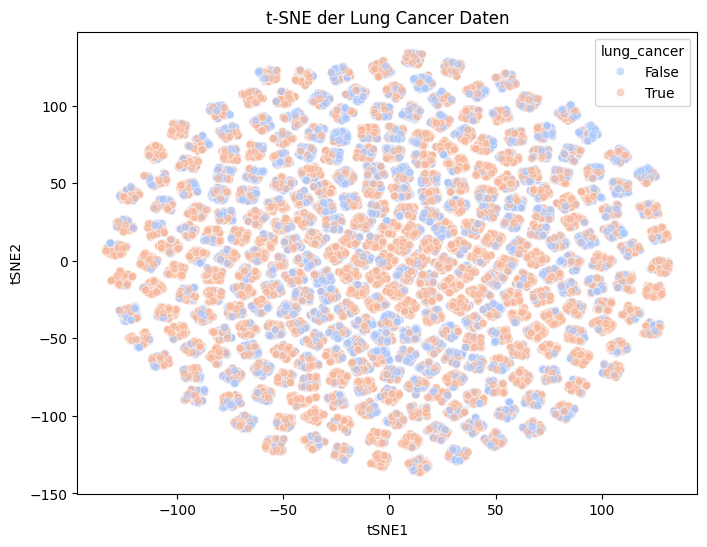

In [14]:
from sklearn.manifold import TSNE

# Vorverarbeitete Daten
X_preproc = preprocessor.fit_transform(X)

# t-SNE
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
X_tsne = tsne.fit_transform(X_preproc)

# DataFrame
tsne_df = pd.DataFrame(X_tsne, columns=['tSNE1', 'tSNE2'])
tsne_df['lung_cancer'] = y.values

# Plot
plt.figure(figsize=(8,6))
sns.scatterplot(data=tsne_df, x='tSNE1', y='tSNE2',
                hue='lung_cancer', palette='coolwarm', alpha=0.6)
plt.title("t-SNE der Lung Cancer Daten")
plt.show()

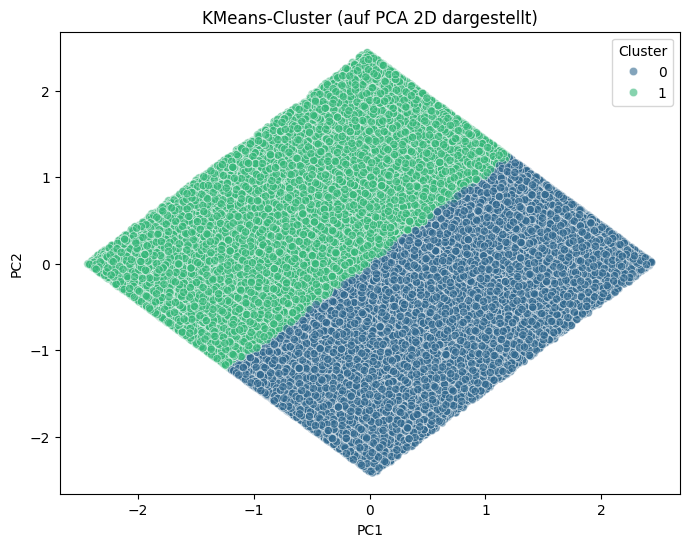

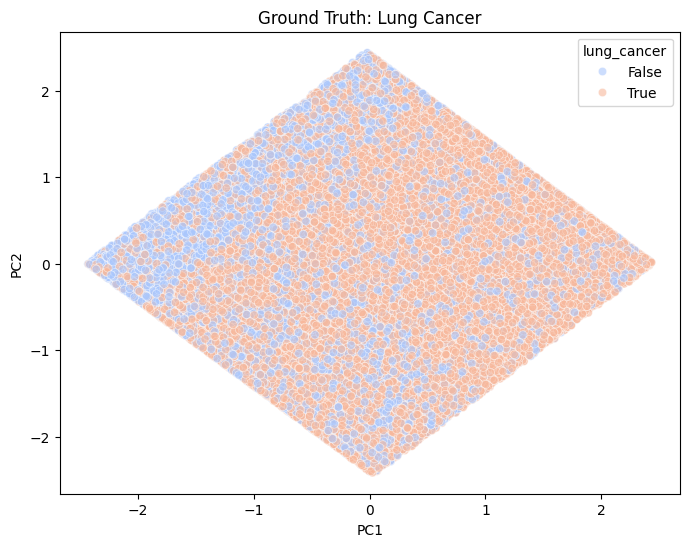

In [16]:
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt

# --- Vorverarbeitete Daten ---
X_preproc = preprocessor.fit_transform(X)

# --- KMeans Clustering ---
kmeans = KMeans(n_clusters=2, random_state=42)  # hier 2 Cluster, weil du auch 2 Klassen hast
clusters = kmeans.fit_predict(X_preproc)

# --- DataFrame für Plot ---
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_preproc)
kmeans_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
kmeans_df['Cluster'] = clusters
kmeans_df['lung_cancer'] = y.values

# --- Plot: KMeans-Cluster im PCA-Raum ---
plt.figure(figsize=(8,6))
sns.scatterplot(data=kmeans_df, x='PC1', y='PC2',
                hue='Cluster', palette='viridis', alpha=0.6)
plt.title("KMeans-Cluster (auf PCA 2D dargestellt)")
plt.show()

# --- Vergleich mit Ground Truth ---
plt.figure(figsize=(8,6))
sns.scatterplot(data=kmeans_df, x='PC1', y='PC2',
                hue='lung_cancer', palette='coolwarm', alpha=0.6)
plt.title("Ground Truth: Lung Cancer")
plt.show()

In [29]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
import pandas as pd
import numpy as np

# Assuming you've already loaded and preprocessed your dataset
# ... (dataset loading and data type conversion as in your previous code) ...

# Define the columns for the preprocessor
numeric_features = ['age', 'pack_years']
categorical_features = ['gender', 'radon_exposure', 'alcohol_consumption']
boolean_features = ['asbestos_exposure', 'secondhand_smoke_exposure',
                    'copd_diagnosis', 'family_history']

# Preprocessor definition
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features),
        ('bool', 'passthrough', boolean_features)
    ])

# Pipeline with preprocessing and Gradient Boosting Classifier
gb_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42))
])

# Prepare the data
X = dataset.drop('lung_cancer', axis=1)
y = dataset['lung_cancer']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
from sklearn.metrics import classification_report, accuracy_score

# Train the pipeline
gb_pipeline.fit(X_train, y_train)

# Make predictions
y_pred = gb_pipeline.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Genauigkeit (Accuracy): {accuracy:.2f}")
print("\nKlassifizierungsbericht (Classification Report):")
print(report)

Genauigkeit (Accuracy): 0.74

Klassifizierungsbericht (Classification Report):
              precision    recall  f1-score   support

       False       0.63      0.40      0.49      3118
        True       0.77      0.90      0.83      6882

    accuracy                           0.74     10000
   macro avg       0.70      0.65      0.66     10000
weighted avg       0.73      0.74      0.72     10000

